## Homework 1

Recall question 3 from last Thursday's in-class assignment. Given a positive integer $n$, you generated a sequence of integers that ended in 1.

1. If $n$ is an odd number, define the _depth_ of $n$ to be the number of odd numbers other than $1$ in this sequence. For example, since the sequence for $n=3$ is $[3, 10, 5, 16, 8, 4, 2, 1]$, the depth of $3$ is $2$. 

Using the code that you have to generate this sequence, find the depths of all odd numbers less than 10,000. Answer, at least, the following two questions: 
* What is the maximum depth among all such numbers?
* What proportion of such numbers have depth equal to 1?

Extra credit: plot the distribution of depths of odd numbers that are less than 10,000 (i.e., the plot shows, for each depth that comes up, the proportion of such numbers that have that depth). In a Markdown cell, tell me something that you notice about the distribution. 

In [30]:
n_depths = []
for i in range (1, 10000, 2):
    # Find the sequence for i
    n = i
    n_sequence = [n]
    while(n != 1):
        if(n % 2 == 0):
            n //= 2
        else:
            n = 3 * n + 1
        n_sequence.append(n)

    # Find the depth of i
    depth = 0
    for j in range (0, len(n_sequence)-1):
        if (n_sequence[j] % 2 == 1):
            depth += 1

    # Add the depth to the list of depths
    n_depths.append(depth)

# Find the maximun depth
max_depth = max(n_depths)

# Find proportion of such numbers have depth equal to 1
depth_1 = n_depths.count(1)
proportion = depth_1 / 10000

print("The maximum depth is", max_depth)
print("The proportion of numbers whose depth is 1 is", proportion)

The maximum depth is 96
The proportion of numbers whose depth is 1 is 0.0006


---

2. Write a custom Python function. The function should take an array of $x$ values as its argument and it returns a set of $y$ values "with noise" for the chi-squared function $y = \frac{1}{4}x e^{-x/2}$. The noise should be put in by adding to $y$ a value of a mean-zero, normally distributed random variable with a small standard deviation (something close to $1/100$, say). After defining your custom function in your session, produce a plot of the chi-squared function on the interval $[0,5]$, together with a scatter plot of 200 noisy $(x,y)$ pairs.
> Generate the $x$-coordinates of the noisy pairs with a uniform distribution.

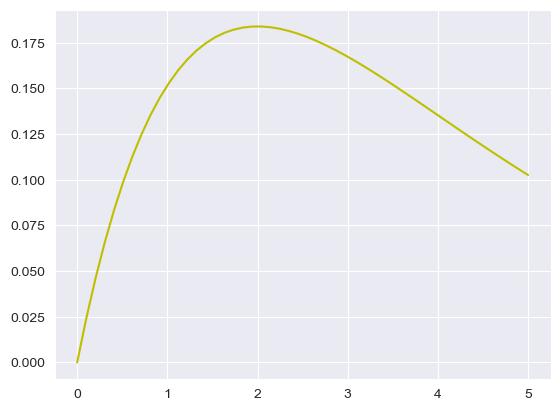

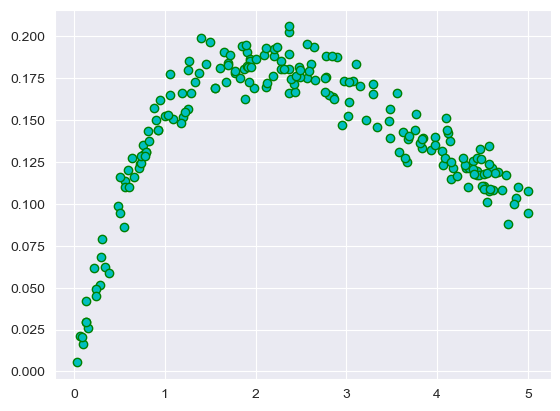

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Makes an array of y values using the x values given in the chi squared function,
# Then generates a list of noise the same size as x and adds it to the list of y values and returns that.
def noisy(x):
    y = (1/4)*x*np.exp(-(x/2))
    n = np.random.normal(0, .01, len(x))
    return y + n

# x is a list of 200 uniformly distrubuted values on the interval [0,5], which is used in the noisy function to get the y values
x = np.random.uniform(0, 5, 200)
y = noisy(x)

# xx are all values from 0 to 5, yy values are those values put into the chi squared function
xx = np.linspace(0, 5)
yy = (1/4)*xx*np.exp(-(xx/2))

# xx and yy are plotted
plt.plot(xx, yy, color = 'y')
plt.show()

# x and y are plotted in a scatter plot
plt.scatter(x, y, color = 'c', edgecolors = 'g')
plt.show()

---

For question 3, we will import a data set. The data set is the data on automobiles available in the DataSets folder. Download that file and put it in the same folder where you are running this notebook. (Or, if you know how, use the `%cd` magic command to be able to access the directory the data set is in.) The name of the file should be `Auto.csv`.

We'll briefly use a DataFrame to import the data, but just in order to extract two NumPy arrays from it. To do this, do the following in this notebook. 

* First, import the Pandas package using the command `import pandas as pd`.
* Second, set a variable equal to `pd.read_csv('Auto.csv')`.
* If the variable used in the last bullet was `my_dataframe`, make two arrays as follows: 
```python 
mpg = my_dataframe['mpg'].to_numpy()
weight = my_dataframe['weight'].to_numpy()
```

The automobile for index `i` has weight `weight[i]` (in lbs.) and gets `mpg[i]` miles-per-gallon.

3. After creating the arrays `mpg` and `weight` as above, use NumPy to do linear regression (find the line of "best fit") on the data `(weight, mpg)`. Plot the data and the line together.

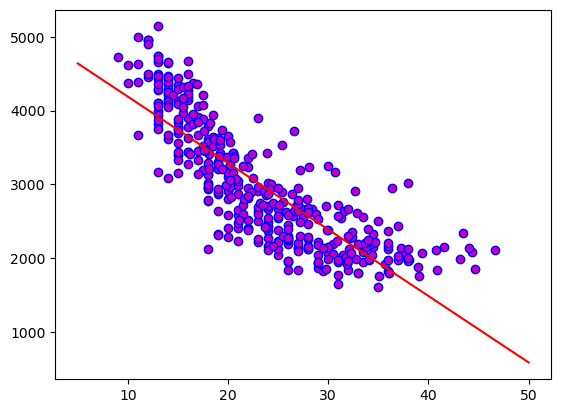

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

my_df = pd.read_csv('Auto.csv')
mpg = my_df['mpg'].to_numpy()
weight = my_df['weight'].to_numpy()

# Scatter plot the data
plt.scatter(mpg, weight, color = 'm', edgecolor = 'b')

# Find the slope and intercept
line = np.polyfit(mpg, weight, 1)
# Set x equal to every number 1 to 50
x = np.linspace(5, 50)
# plot the line and show both on the same graph
plt.plot(x, x*line[0] + line[1], color = 'r')
plt.show()